In [2]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import lib.general_utilities as gu

# storing data directories for this notebook.
img_out_dir = 'data/images/LDA_analysis_NB5/'
data_out_dir = 'data/pickled/LDA_analysis_NB5/'

%matplotlib inline

In [3]:
filename = 'data/processed_dataset_df/pulledTweetsProcessedAndClassified_df'
air_df = gu.read_pickle_obj(filename)

In [4]:
air_df.columns

Index(['airline', 'date', 'text', 'Processed_tweet', 'emoji_enc_text',
       'emojis', 'sentiment_predicted_nb', 'sentiment_predicted_lr'],
      dtype='object')

In [5]:
air_df.head(10)

airline                date  \
0  UnitedAirlines 2018-01-09 21:19:36   
1  UnitedAirlines 2018-01-09 21:06:39   
2  UnitedAirlines 2018-01-09 21:02:07   
3  UnitedAirlines 2018-01-09 20:56:00   
4  UnitedAirlines 2018-01-09 20:49:48   
5  UnitedAirlines 2018-01-09 20:41:02   
6  UnitedAirlines 2018-01-09 20:33:20   
7  UnitedAirlines 2018-01-09 20:24:22   
8  UnitedAirlines 2018-01-09 20:15:15   
9  UnitedAirlines 2018-01-09 19:48:04   

                                                text  \
0  Kudos to the #unitedairlines staff for helping...   
1  And the painful experience with  @united conti...   
2  @united is the shittiest airline company I hav...   
3  Oh joy. You came home. #lostluggage #unitedair...   
4  RT @officiParas: #UnitedAirlines Offers Custom...   
5  #UnitedAirlines - still can’t understand why a...   
6   My knees #unitedAIRLINES https://t.co/qErdox2Cht   
7  @theweeknd cuts ties with H&amp;M over 'monkey...   
8  A peek inside Classified, where CEOs and celeb...   
9  Montreal, Canada to Phoenix, Arizona for only ...   

                                     Processed_tweet  \
0  kudos staff helping crazy reservation nice sen...   
1  painful experience continues ask time lengthy ...   
2  shittiest airline company experienced fuck nev...   
3                       oh joy came home lostluggage   
4  rt offer customer free checked bag travel tofr...   
5  can’t understand 1 million miler 2mm board grp...   
6                                               knee   
7  cut tie hampm monkey ad blm equality4all monke...   
8  peek inside classified ceo celebrity dine hidd...   
9  montreal canada phoenix arizona 271 cad roundt...   

                                      emoji_enc_text emojis  \
0  kudos staff helping crazy reservation nice sen...          
1  painful experience continues ask time lengthy ...          
2  shittiest airline company experienced fuck nev...          
3                       oh joy came home lostluggage          
4  rt offer customer free checked bag travel tofr...          
5  can’t understand 1 million miler 2mm board grp...          
6                                               knee          
7  cut tie hampm monkey ad blm equality4all monke...          
8  peek inside classified ceo celebrity dine hidd...          
9  montreal canada phoenix arizona 271 cad roundt...          

  sentiment_predicted_nb sentiment_predicted_lr  
0               positive               positive  
1               negative               negative  
2               negative               negative  
3               negative               negative  
4                neutral               negative  
5               negative               negative  
6               negative                neutral  
7               negative               negative  
8                neutral                neutral  
9               negative                neutral

In [22]:
#!pip install gensim

In [7]:
import gensim
import re
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string

In [9]:
def tokenize(text):
    return(text.split())

## Gensim LDA

In [10]:
doc_clean = air_df['emoji_enc_text']
# Corpus is in string format and doc2bow array expects tokens. Let's tokenize doc strings.
doc_clean = doc_clean.apply(tokenize)
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [11]:
corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)

In [12]:
# Creating the object for LDA model.
Lda = LdaModel

In [13]:
lda_model = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)

In [14]:
# Pickle lda model.
gu.pickle_obj(data_out_dir+'lda_transf_PulledTweets_allclasses.obj', Lda)

# Pickle lda dictionary.
gu.pickle_obj(data_out_dir+'lda_dictionary_PulledTweets_allclasses.obj', dictionary)

# Pickle lda transformed corpus.
gu.pickle_obj(data_out_dir+'lda_model_PulledTweets_allclasses.obj', lda_model)

In [15]:
print(lda_model.print_topics(num_topics=10, num_words=10))

[(0, '0.015*"customer" + 0.014*"hour" + 0.013*"bag" + 0.012*"airline" + 0.012*"help" + 0.011*"year" + 0.011*"service" + 0.009*"airport" + 0.008*"2" + 0.008*"worst"'), (1, '0.016*"rt" + 0.014*"bonus" + 0.012*"airline" + 0.011*"employee" + 0.011*"travel" + 0.010*"passenger" + 0.008*"united" + 0.007*"2017" + 0.007*"state" + 0.007*"tax"'), (2, '0.024*"hour" + 0.015*"delayed" + 0.014*"plane" + 0.014*"delay" + 0.013*"waiting" + 0.010*"gate" + 0.010*"airport" + 0.010*"day" + 0.010*"time" + 0.009*"jfk"'), (3, '0.014*"rt" + 0.011*"detroit" + 0.011*"bird" + 0.008*"return" + 0.006*"plane" + 0.006*"3" + 0.006*"cockpit" + 0.006*"join" + 0.006*"today" + 0.005*"turn"'), (4, '0.017*"rt" + 0.014*"airline" + 0.013*"747" + 0.011*"attendant" + 0.011*"atl" + 0.010*"boeing" + 0.008*"denver" + 0.007*"opening" + 0.007*"sell" + 0.006*"parttime"'), (5, '0.055*"job" + 0.030*"agent" + 0.026*"apply" + 0.019*"ramp" + 0.011*"hiring" + 0.010*"2018" + 0.009*"year" + 0.008*"new" + 0.008*"looking" + 0.008*"needed"'), (6

In [16]:
topics_df = pd.DataFrame(lda_model.print_topics(num_topics=10, num_words=10))

In [17]:
topics_df.drop(0, axis = 1, inplace=True)

In [18]:
topics_df[:15]

1
0  0.015*"customer" + 0.014*"hour" + 0.013*"bag" ...
1  0.016*"rt" + 0.014*"bonus" + 0.012*"airline" +...
2  0.024*"hour" + 0.015*"delayed" + 0.014*"plane"...
3  0.014*"rt" + 0.011*"detroit" + 0.011*"bird" + ...
4  0.017*"rt" + 0.014*"airline" + 0.013*"747" + 0...
5  0.055*"job" + 0.030*"agent" + 0.026*"apply" + ...
6  0.016*"customer" + 0.012*"service" + 0.011*"ch...
7  0.069*"line" + 0.065*"air" + 0.046*"dal" + 0.0...
8  0.019*"management" + 0.017*"lagos" + 0.016*"an...
9  0.017*"share" + 0.012*"rt" + 0.011*"price" + 0...

In [19]:
topic = topics_df.iloc[0,:]

In [20]:
topic_lst=topic.tolist()

In [21]:
topic_lst

['0.015*"customer" + 0.014*"hour" + 0.013*"bag" + 0.012*"airline" + 0.012*"help" + 0.011*"year" + 0.011*"service" + 0.009*"airport" + 0.008*"2" + 0.008*"worst"']

In [26]:
#!pip install pyLDAvis

In [27]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [28]:
vis_data = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis_data

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      18.558475        1       1  0.204202 -0.069344
0      14.009170        1       2  0.157609 -0.044664
6      11.208936        1       3  0.138260 -0.034513
5       9.500591        1       4 -0.012459  0.110501
3       8.621503        1       5  0.051851 -0.001509
1       8.563424        1       6  0.025468  0.035780
7       8.079703        1       7 -0.238364 -0.245675
8       7.676626        1       8 -0.163918  0.185290
4       7.032352        1       9 -0.046994  0.083672
9       6.749221        1      10 -0.115656 -0.019538, topic_info=      Category        Freq              Term       Total  loglift  logprob
term                                                                      
420    Default  339.000000              line  339.000000  30.0000  30.0000
1746   Default  337.000000               air  337.000000  29.0000  29.0000
1519   Default  315.000000               job  315.000000  28.0000  28.0000
6207   Default  228.000000               dal  228.000000  27.0000  27.0000
241    Default  200.000000             agent  200.000000  26.0000  26.0000
5760   Default  153.000000             apply  153.000000  25.0000  25.0000
212    Default  415.000000              hour  415.000000  24.0000  24.0000
34     Default  279.000000          customer  279.000000  23.0000  23.0000
842    Default  109.000000              ramp  109.000000  22.0000  22.0000
287    Default  192.000000           delayed  192.000000  21.0000  21.0000
335    Default   89.000000        management   89.000000  20.0000  20.0000
427    Default  151.000000           waiting  151.000000  19.0000  19.0000
8059   Default   81.000000             lagos   81.000000  18.0000  18.0000
8110   Default   80.000000               del   80.000000  17.0000  17.0000
31     Default  176.000000               bag  176.000000  16.0000  16.0000
244    Default  196.000000             delay  196.000000  15.0000  15.0000
8050   Default   77.000000           anambra   77.000000  14.0000  14.0000
8049   Default   76.000000           adamawa   76.000000  13.0000  13.0000
8052   Default   76.000000             borno   76.000000  12.0000  12.0000
2308   Default   71.000000             share   71.000000  11.0000  11.0000
720    Default  119.000000             check  119.000000  10.0000  10.0000
58     Default  175.000000              year  175.000000   9.0000   9.0000
2456   Default   73.000000             bonus   73.000000   8.0000   8.0000
115    Default  275.000000             plane  275.000000   7.0000   7.0000
8182   Default   65.000000           plateau   65.000000   6.0000   6.0000
130    Default  257.000000           service  257.000000   5.0000   5.0000
39     Default  472.000000                rt  472.000000   4.0000   4.0000
1910   Default  176.000000               jfk  176.000000   3.0000   3.0000
480    Default  138.000000              help  138.000000   2.0000   2.0000
19     Default  417.000000           airline  417.000000   1.0000   1.0000
...        ...         ...               ...         ...      ...      ...
525    Topic10    9.524749          shanghai   10.268931   2.6205  -6.0639
8674   Topic10    9.464080           insider   10.208258   2.6200  -6.0703
1070   Topic10    8.879485         featuring    9.623639   2.6153  -6.1340
3472   Topic10    8.700698             grand    9.444881   2.6137  -6.1544
2675   Topic10    8.676466           selling    9.420680   2.6135  -6.1572
11505  Topic10    8.303881               www    9.048035   2.6099  -6.2011
11504  Topic10    8.303881            manuel    9.048035   2.6099  -6.2011
11503  Topic10    8.303881             index    9.048035   2.6099  -6.2011
11502  Topic10    8.303881  imprimermonlivre    9.048035   2.6099  -6.2011
11500  Topic10    8.303881           belleli    9.048035   2.6099  -6.2011
296    Topic10   46.078894             price   55.243303   2.5144  -4.4874
8673   To

In [29]:
img_out_dir

'data/images/LDA_analysis_NB5/'

In [30]:
pyLDAvis.save_html(vis_data,img_out_dir+'lda_vis_pulled_tweets_allclasses.html')

In [ ]:
# credit: https://markroxor.github.io/gensim/static/notebooks/gensim_news_classification.html

## Sklearn LDA

In [57]:
filename = 'data/processed_dataset_df/pulledTweetsProcessedAndClassified_df'
air_df = gu.read_pickle_obj(filename)

In [31]:
air_df.columns

Index(['airline', 'date', 'text', 'Processed_tweet', 'emoji_enc_text',
       'emojis', 'sentiment_predicted_nb', 'sentiment_predicted_lr'],
      dtype='object')

In [32]:
def display_topics(model, feature_names, file2saveTopicPlot, no_words = 10, plot = False, plot_dim=(5,2)):
    
    topics_tokens = []
    
    for topic_idx, topic in enumerate(model.components_):

        topic = zip(feature_names, topic)
        topic = sorted(topic, key=lambda pair: pair[1])
        
        topic_words = [(token, counts)
                       for token, counts in topic[:-no_words - 1:-1]]
        
        topics_tokens.append(topic_words)
        
        if not plot:
            print ("Topic %d:" % (topic_idx))
            print (topic_words)
        
    
    if plot:
        
        plot_matrix = np.arange(10).reshape(5,2)
    
        fig, ax = plt.subplots(figsize=(10, 10), nrows=5, ncols=2)
        
        topics = [
            {key: value for key, value in topic} 
                  for topic in topics_tokens
        ]
        
        row = 0
        
        for topic_id, topic in enumerate(topics):
            
            column = (0 if topic_id % 2 == 0 else 1)
                
            chart = pd.DataFrame([topic]).iloc[0].sort_values(axis=0)
            chart.plot(kind="barh", title="Topic %d" % topic_id, ax=ax[row, column])
                
            row += 1 if column == 1 else 0
        
        plt.tight_layout()
        plt.savefig(file2saveTopicPlot)

In [34]:
def LDA_diff_corpuses(cleaned_corpus, file2save_model, file2saveVectorizer, file2saveTopicPlot):
    vectorizer = CountVectorizer(ngram_range=(1,2))
    X = vectorizer.fit_transform(cleaned_corpus)

    lda   = LatentDirichletAllocation(n_topics=10, learning_method="batch", random_state=42)
    model = lda.fit(X)  
            
    # save data.
    gu.pickle_obj(file2save_model, model)
    gu.pickle_obj(file2saveVectorizer, vectorizer)

    display_topics(model, vectorizer.get_feature_names(), file2saveTopicPlot, no_words=10, plot=True)

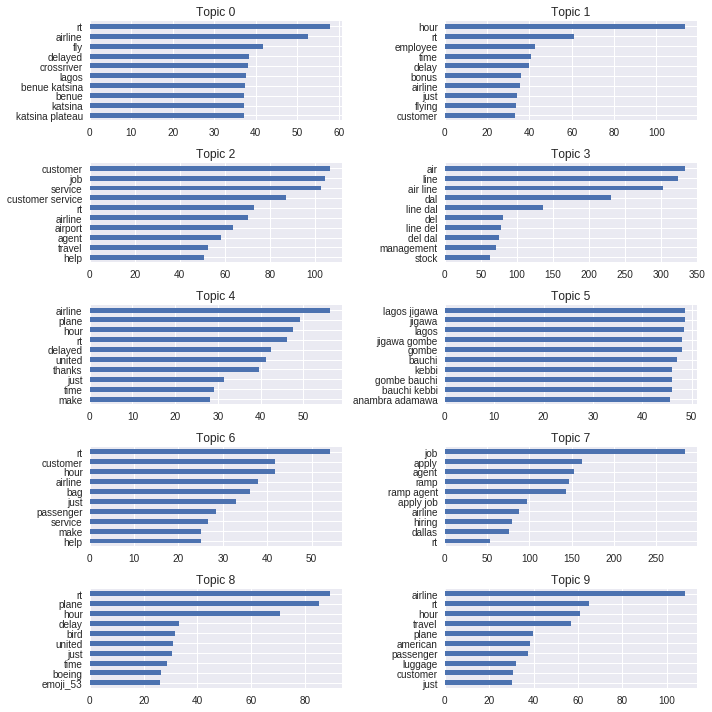

In [36]:
# All classes corpus.
file2save_model = data_out_dir+'LDASKL_model_pulledTweets_corpus.obj'
file2saveVectorizer = data_out_dir+'CV_pulledTweets_corpus.obj'
file2saveTopicPlot = img_out_dir+'TopicPlot_pulledTweets_corpus'
LDA_diff_corpuses(air_df['emoji_enc_text'], file2save_model, file2saveVectorizer, file2saveTopicPlot)

## Let's display topics by document (text, tweet...)

In [38]:
# read in pickled models.
lDA_model_allcl = gu.read_pickle_obj(data_out_dir+'LDASKL_model_all_classes_corpus.obj')
vect_allcl = gu.read_pickle_obj(data_out_dir+'CV_pulledTweets_corpus.obj')

# lDA_model_pos = gu.read_pickle_obj(data_out_dir+'LDASKL_model_positive_class_corpus.obj')
# vect_pos = gu.read_pickle_obj(data_out_dir+'CV_positive_class_corpus.obj')

# lDA_model_neg = gu.read_pickle_obj(data_out_dir+'LDASKL_model_negative_class_corpus.obj')
# vect_neg = gu.read_pickle_obj(data_out_dir+'CV_negative_class_corpus.obj')

# lDA_model_net = gu.read_pickle_obj(data_out_dir+'LDASKL_model_neutral_class_corpus.obj')
# vect_neut = gu.read_pickle_obj(data_out_dir+'CV_neutral_class_corpus.obj')

In [102]:
# all classes data.

In [ ]:
### Need to look into the following code.

In [ ]:
cleaned_corpus = air_df['emoji_enc_text']
dtm = vect_allcl.transform(cleaned_corpus)
comp = lDA_model_allcl.transform(dtm)

In [123]:
document_topics = pd.DataFrame(comp, columns=["topic %d" % i for i in range(comp.shape[1])])
document_topics.head(5)

topic 0   topic 1   topic 2   topic 3   topic 4   topic 5   topic 6  \
0  0.050006  0.050009  0.050009  0.050012  0.050006  0.549939  0.050008   
1  0.005001  0.005000  0.954994  0.005001  0.005000  0.005001  0.005000   
2  0.012501  0.012501  0.012502  0.012501  0.012501  0.012502  0.887486   
3  0.003847  0.003847  0.965379  0.003847  0.003847  0.003847  0.003847   
4  0.008335  0.924987  0.008335  0.008335  0.008335  0.008335  0.008335   

    topic 7   topic 8   topic 9  
0  0.050004  0.050003  0.050004  
1  0.005000  0.005001  0.005001  
2  0.012502  0.012501  0.012502  
3  0.003847  0.003847  0.003847  
4  0.008334  0.008335  0.008334

## Let's take a look at the highest rated topic 0 documents¶

In [119]:
top_topics = document_topics['topic 0'] > .8
top_docs_topic_0 = document_topics[top_topics]
top_docs_topic_0.head(5)

topic 0   topic 1   topic 2   topic 3   topic 4   topic 5   topic 6  \
27  0.962496  0.004167  0.004167  0.004167  0.004167  0.004167  0.004167   
32  0.887479  0.012502  0.012503  0.012503  0.012502  0.012502  0.012502   
42  0.943745  0.006251  0.006251  0.006250  0.006250  0.006251  0.006251   
64  0.959085  0.004546  0.004546  0.004546  0.004546  0.004546  0.004547   
80  0.959086  0.004546  0.004546  0.004546  0.004546  0.004546  0.004546   

     topic 7   topic 8   topic 9  
27  0.004167  0.004167  0.004167  
32  0.012501  0.012503  0.012502  
42  0.006250  0.006251  0.006250  
64  0.004546  0.004546  0.004546  
80  0.004546  0.004546  0.004546

In [121]:
cleaned_corpus[top_docs_topic_0.index.values[:10]]

27     plz help win bid upgrade flight 227 laxgtsea e...
32                                wish flew atlanta soon
42     heyyyy guyyyys trying get hour someone call pl...
64     website btw new website isnt great user experi...
80     beautiful frontend design right cool still boo...
93           another delayed flight likingyoulessandless
118    normal receive reply central baggage baggageis...
120                             jump dallasaustin market
123             begin dallasaustin flight april 889 ketr
124    congrats got business ewr sfolax fuck fl1289 s...
Name: lemma_stopw_clean_text, dtype: object

## Let's check out the documents within the source content¶

In [124]:
top_documents = top_docs_topic_0.index.values
cleaned_corpus[top_documents].head(10)

27     plz help win bid upgrade flight 227 laxgtsea e...
32                                wish flew atlanta soon
42     heyyyy guyyyys trying get hour someone call pl...
64     website btw new website isnt great user experi...
80     beautiful frontend design right cool still boo...
93           another delayed flight likingyoulessandless
118    normal receive reply central baggage baggageis...
120                             jump dallasaustin market
123             begin dallasaustin flight april 889 ketr
124    congrats got business ewr sfolax fuck fl1289 s...
Name: lemma_stopw_clean_text, dtype: object

In [ ]:
# Note: In sklearn we get pseudocounts. In Gensim, we get probabilities.

In [ ]:
# Credits: Dave's LDA lesson.

In [ ]:
# I can cotinue to look into this and study it with unclassified data.
# pull tweets, use unsupervised learning method LDA, to identify topics within the corpus of tweets.